# SVM implementation (100 samples) with data normalisation

import dataset

In [22]:
import pandas as pd
df=pd.read_excel('clusters.xlsx')
df.head()
%matplotlib inline

In [2]:
df.drop(columns=['Unnamed: 2','Unnamed: 3'],axis=0, inplace=True)

In [3]:
df

,r_new,cluster
0,1.656799,0
1,1.656799,0
2,1.656799,0
3,1.656799,0
4,1.656799,0
...,...,...
52962,2.105184,9
52963,2.105184,9
52964,2.105184,9
52965,2.105184,9


In [4]:
import numpy as np
array=df.values

In [5]:
irr=df['r_new']
tar=df['cluster']
import matplotlib.pyplot as plt
plt.scatter(irr,tar)
plt.xlabel('No. of faulty')
plt.ylabel('type of fault')
plt.title('Irradiance against target ')


Text(0.5, 1.0, 'Irradiance against target ')

In [6]:
array[:,1:]

array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [9.],
       [9.]])

In [7]:
x=array[:,0:]

In [8]:
y=array[:,1]


In [9]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(42373, 2)

In [11]:
svm.fit(x_train,y_train)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred=svm.predict(x_test)

In [13]:
import sklearn.metrics as metrics
z=metrics.accuracy_score(y_test,y_pred)
z

1.0

In [14]:
print (metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1142
         1.0       1.00      1.00      1.00      1019
         2.0       1.00      1.00      1.00      1072
         3.0       1.00      1.00      1.00      1105
         4.0       1.00      1.00      1.00       999
         5.0       1.00      1.00      1.00      1043
         6.0       1.00      1.00      1.00      1105
         7.0       1.00      1.00      1.00       993
         8.0       1.00      1.00      1.00      1044
         9.0       1.00      1.00      1.00      1072

    accuracy                           1.00     10594
   macro avg       1.00      1.00      1.00     10594
weighted avg       1.00      1.00      1.00     10594



In [15]:
print (metrics.confusion_matrix(y_test,y_pred))

[[1142    0    0    0    0    0    0    0    0    0]
 [   0 1019    0    0    0    0    0    0    0    0]
 [   0    0 1072    0    0    0    0    0    0    0]
 [   0    0    0 1105    0    0    0    0    0    0]
 [   0    0    0    0  999    0    0    0    0    0]
 [   0    0    0    0    0 1043    0    0    0    0]
 [   0    0    0    0    0    0 1105    0    0    0]
 [   0    0    0    0    0    0    0  993    0    0]
 [   0    0    0    0    0    0    0    0 1044    0]
 [   0    0    0    0    0    0    0    0    0 1072]]


In [16]:
df.tail()

,r_new,cluster
52962,2.105184,9
52963,2.105184,9
52964,2.105184,9
52965,2.105184,9
52966,2.105184,9


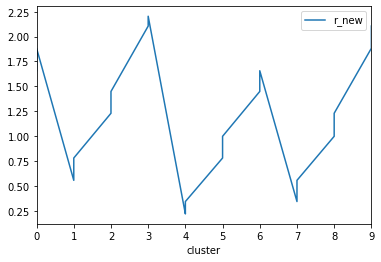

In [28]:
df.plot(x='cluster',y='r_new')